In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
concrete=pd.read_csv('A:/Data Science/assignments/Neural network/concrete.csv')

In [3]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [8]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
concrete_scaled=scale.fit_transform(concrete)
concrete_scaled=pd.DataFrame(concrete_scaled,columns=concrete.columns)

In [9]:
concrete_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176,0.343341
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714,0.263859
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176,0.334994
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176,0.542170
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176,0.198829


In [13]:
concrete_scaled.shape

(1030, 9)

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn.model_selection import train_test_split

In [14]:
X=concrete_scaled.iloc[:,0:8]
y=concrete_scaled.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
#Build 3 hidden layers
def prep(layers):
    mod=Sequential()
    for i in range(1,4):
        if (i==1):
             mod.add(Dense(layers[i],input_dim=layers[0],activation='relu'))
        else:
             mod.add(Dense(layers[i],kernel_initializer='normal',activation='relu'))
    mod.add(Dense(layers[-1],kernel_initializer='normal',activation='linear'))
    mod.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    return mod

In [40]:
layers=prep([8,50,40,20,1])

In [24]:
layers.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________


In [42]:
layers.fit(X_train,y_train,epochs=80)

Epoch 1/80
824/824 [==============================] - 0s 236us/step - loss: 0.1665 - accuracy: 0.0000e+00
Epoch 2/80
824/824 [==============================] - 0s 55us/step - loss: 0.0460 - accuracy: 0.0012
Epoch 3/80
824/824 [==============================] - 0s 52us/step - loss: 0.0314 - accuracy: 0.0012
Epoch 4/80
824/824 [==============================] - 0s 52us/step - loss: 0.0246 - accuracy: 0.0012
Epoch 5/80
824/824 [==============================] - 0s 58us/step - loss: 0.0208 - accuracy: 0.0012
Epoch 6/80
824/824 [==============================] - 0s 58us/step - loss: 0.0199 - accuracy: 0.0012
Epoch 7/80
824/824 [==============================] - 0s 62us/step - loss: 0.0185 - accuracy: 0.0012
Epoch 8/80
824/824 [==============================] - 0s 57us/step - loss: 0.0169 - accuracy: 0.0012
Epoch 9/80
824/824 [==============================] - 0s 57us/step - loss: 0.0163 - accuracy: 0.0012
Epoch 10/80
824/824 [==============================] - 0s 58us/step - loss: 0.0155 - a

824/824 [==============================] - 0s 80us/step - loss: 0.0039 - accuracy: 0.0012


In [43]:
predicted=layers.predict(X_test)
predicted1=pd.Series(i[0] for i in predicted)
predicted1

0      0.612510
1      0.191102
2      0.051975
3      0.726359
4      0.426634
         ...   
201    0.368448
202    0.366519
203    0.240612
204    0.399010
205    0.097817
Length: 206, dtype: float64

In [44]:
np.corrcoef(predicted1,y_test.values)

array([[1.        , 0.95640136],
       [0.95640136, 1.        ]])

In [45]:
import seaborn as sns

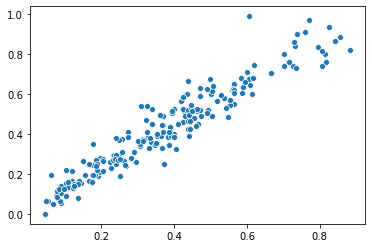

In [46]:
sns.scatterplot(predicted1,y_test.values)

In [ ]:
%Accuracy of this model is 96%